In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

ImportError: No module named 'sklearn.model_selection'

# Section 1 - Business/Problem Understanding


# Section 2 - Data Understanding

In [28]:
#Read in the data from a csv file using Pandas
df = pd.read_csv("bus_data/cleaned_data/line15.csv", low_memory=False, header=None)
df.columns = ["Timestamp", "LineID", "Direction", "JourneyPatternID", "TimeFrame", 
              "VehicleJourneyID", "Operator", "Congestion", "Lon", "Lat", 
              "Delay", "BlockID", "VehicleID", "StopID", "AtStop"]
print("The number of rows are:",df.shape[0])#Prints the number of rows
print("The number of rows are:",df.shape[1])#Prints the number of columns

The number of rows are: 2254343
The number of rows are: 15


In [29]:
df.head(1)

,Timestamp,LineID,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
0,1352160000000000,15,0,00150001,2012-11-05,5826,RD,0,-6.258584,53.340099,-361,15013,33210,4870,0


In [30]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns

In [31]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')   

In [32]:
# Convert Unix timestamp to datetime

# Take uneccesary trailing zeroes off of unix timestamp. 
df['Timestamp'] = df['Timestamp'].apply(lambda x: x//1000000)

# Convert the timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

In [33]:
# Add day of week column
df['Day'] = df['Timestamp'].dt.dayofweek

In [34]:
# Add hour of day column
df['Hour'] = df['Timestamp'].dt.hour

Describe Categorical Features

To begin, we must understand what each feature in our dataset means. There are many self-explanatory ID fields such as productId, SellerId and MarketplaceId. The productId is a unique code given for a specific product type, this means that the same product posted by different sellers would have the same ID. 
SellerId is a unique ID for each individual account which can sell multiple products. MarketplaceId is a constant that indicates all items are sold on amazon. A less obvious “ID” is the TimeOfOfferChange indicating a unique time of sale.  
Next we will investigate the different categorical and continuous features, find out whether they are classified correctly and what they all mean.

In [35]:
#Print data types

In [36]:
df.dtypes

Timestamp           datetime64[ns]
LineID                       int64
Direction                    int64
JourneyPatternID          category
TimeFrame                 category
VehicleJourneyID             int64
Operator                  category
Congestion                   int64
Lon                        float64
Lat                        float64
Delay                        int64
BlockID                      int64
VehicleID                    int64
StopID                    category
AtStop                       int64
Day                          int64
Hour                         int64
dtype: object

In [37]:
# #Make objects categorical 
# object_columns = df.select_dtypes(['object']).columns
# for column in object_columns:
#     df[column] = df[column].astype('category')

In [38]:
# Descriptive stats for categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
JourneyPatternID,2254287,15,00150001,607458
TimeFrame,2254343,26,2012-11-07,104579
Operator,2254343,5,RD,1594991
StopID,2254343,250,6282,125537


In [39]:
# Descriptive stats for continuous features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LineID,2254343.0,15.000000,0.000000,15.000000,15.000000,15.000000,15.000000,15.000000
Direction,2254343.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VehicleJourneyID,2254343.0,6298.909057,24939.675830,2564.000000,3189.000000,5220.000000,5881.000000,997396.000000
Congestion,2254343.0,0.024897,0.155811,0.000000,0.000000,0.000000,0.000000,1.000000
Lon,2254343.0,-6.260996,0.050541,-6.387784,-6.300231,-6.263592,-6.236675,-6.100584
Lat,2254343.0,53.331982,0.040214,53.186035,53.304447,53.333710,53.348286,53.421665
Delay,2254343.0,-6.497476,473.516670,-14136.000000,-191.000000,0.000000,136.000000,10882.000000
BlockID,2254343.0,15041.411825,805.495302,15001.000000,15010.000000,15020.000000,15032.000000,150099.000000
VehicleID,2254343.0,32641.225763,2483.145428,24549.000000,33020.000000,33459.000000,33493.000000,40033.000000
AtStop,2254343.0,0.236423,0.424885,0.000000,0.000000,0.000000,0.000000,1.000000


In [40]:
# Convert some features to categorical
for column in ['LineID', 'Direction','VehicleJourneyID', 'Congestion', 'BlockID', 'VehicleID', 'AtStop','Day','Hour']:
    df[column] = df[column].astype('category')

In [41]:
df.dtypes

Timestamp           datetime64[ns]
LineID                    category
Direction                 category
JourneyPatternID          category
TimeFrame                 category
VehicleJourneyID          category
Operator                  category
Congestion                category
Lon                        float64
Lat                        float64
Delay                        int64
BlockID                   category
VehicleID                 category
StopID                    category
AtStop                    category
Day                       category
Hour                      category
dtype: object

### Continuous Feature Analysis and Understanding

In [42]:
# Data preparation - Select columns containing continuous data
continuous_columns = df[['Lon','Lat','Delay']].columns
# Print table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Lon,2254343.0,-6.260996,0.050541,-6.387784,-6.300231,-6.263592,-6.236675,-6.100584
Lat,2254343.0,53.331982,0.040214,53.186035,53.304447,53.333710,53.348286,53.421665
Delay,2254343.0,-6.497476,473.516670,-14136.000000,-191.000000,0.000000,136.000000,10882.000000


<b>Lon</b>: Low standard deviation describes Dublin area

<b>Lat</b>: Low standard deviation describes Dublin area 

<b>Delay</b>: The average delay is 6 seconds. The standard deviation is almost 8 minutes. The most ahead of schedule a 15 Bus was was almost 4 hours which is suspicious. The most behind schedule a bus was was 3hrs which is also suspicious.


### Understanding The Categorical Features

In [43]:
#This shows us important data about categorical features and IDs.
#For example, the number of unique IDs can tell us that a feature is a constant
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
LineID,2254343,1,15,2254343
Direction,2254343,1,0,2254343
JourneyPatternID,2254287,15,00150001,607458
TimeFrame,2254343,26,2012-11-07,104579
VehicleJourneyID,2254343,3264,5142,3577
Operator,2254343,5,RD,1594991
Congestion,2254343,2,0,2198217
BlockID,2254343,55,15105,77305
VehicleID,2254343,174,33475,50155
StopID,2254343,250,6282,125537


<b>Categorical:</b><br>

<b>LineID:</b>

<b>Direction:</b> Very unsual that direction is constant?

<b>JourneyPatternID:</b> 
 
<b>TimeFrame:</b> 

<b>VehicleJourneyID</b> Unique journeys made by any 15 bus.

<b>Operator:</b>

<b>Congestion:</b>

<b>BlockID:</b> 

<b>VehicleID:</b>

<b>StopID:</b>

<b>AtStop:</b> 

<b>Day:</b>

<b>Hour:</b> 

### Dropping Duplicate rows and constant columns

In [44]:
#Drop the duplicates, but keep the first occurance of when they occur
df = df.drop_duplicates(keep='first')

In [45]:
#Remove constant columns
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [46]:
#The data now no longer contains duplicate rows that would skews the data or irrelevant constant columns.
df.shape

(2254310, 15)

In [47]:
df.head()

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop,Day,Hour
0,2012-11-06 00:00:00,00150001,2012-11-05,5826,RD,0,-6.258584,53.340099,-361,15013,33210,4870,0,1,0
1,2012-11-06 00:00:04,00151001,2012-11-05,5929,HN,0,-6.162066,53.402668,401,15105,33502,6317,1,1,0
2,2012-11-06 00:00:04,015A1001,2012-11-05,3118,RD,0,-6.236166,53.342152,0,15010,33469,2499,0,1,0
3,2012-11-06 00:00:10,00150001,2012-11-05,5843,RD,0,-6.323327,53.277756,-463,15021,33254,4869,0,1,0
4,2012-11-06 00:00:12,015A0001,2012-11-05,3130,RD,0,-6.328856,53.304470,-106,15009,33020,1102,0,1,0


In [48]:
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Lon,2254310.0,-6.260996,0.050541,-6.387784,-6.300231,-6.263592,-6.236676,-6.100584
Lat,2254310.0,53.331982,0.040214,53.186035,53.304447,53.333710,53.348286,53.421665
Delay,2254310.0,-6.495857,473.518038,-14136.000000,-191.000000,0.000000,136.000000,10882.000000


In [49]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
JourneyPatternID,2254254,15,00150001,607448
TimeFrame,2254310,26,2012-11-07,104579
VehicleJourneyID,2254310,3264,5142,3576
Operator,2254310,5,RD,1594969
Congestion,2254310,2,0,2198185
BlockID,2254310,55,15105,77304
VehicleID,2254310,174,33475,50155
StopID,2254310,250,6282,125534
AtStop,2254310,2,0,1721340
Day,2254310,7,1,408052


## Plotting Features 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD15E5A1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DD15C750F0>]], dtype=object)

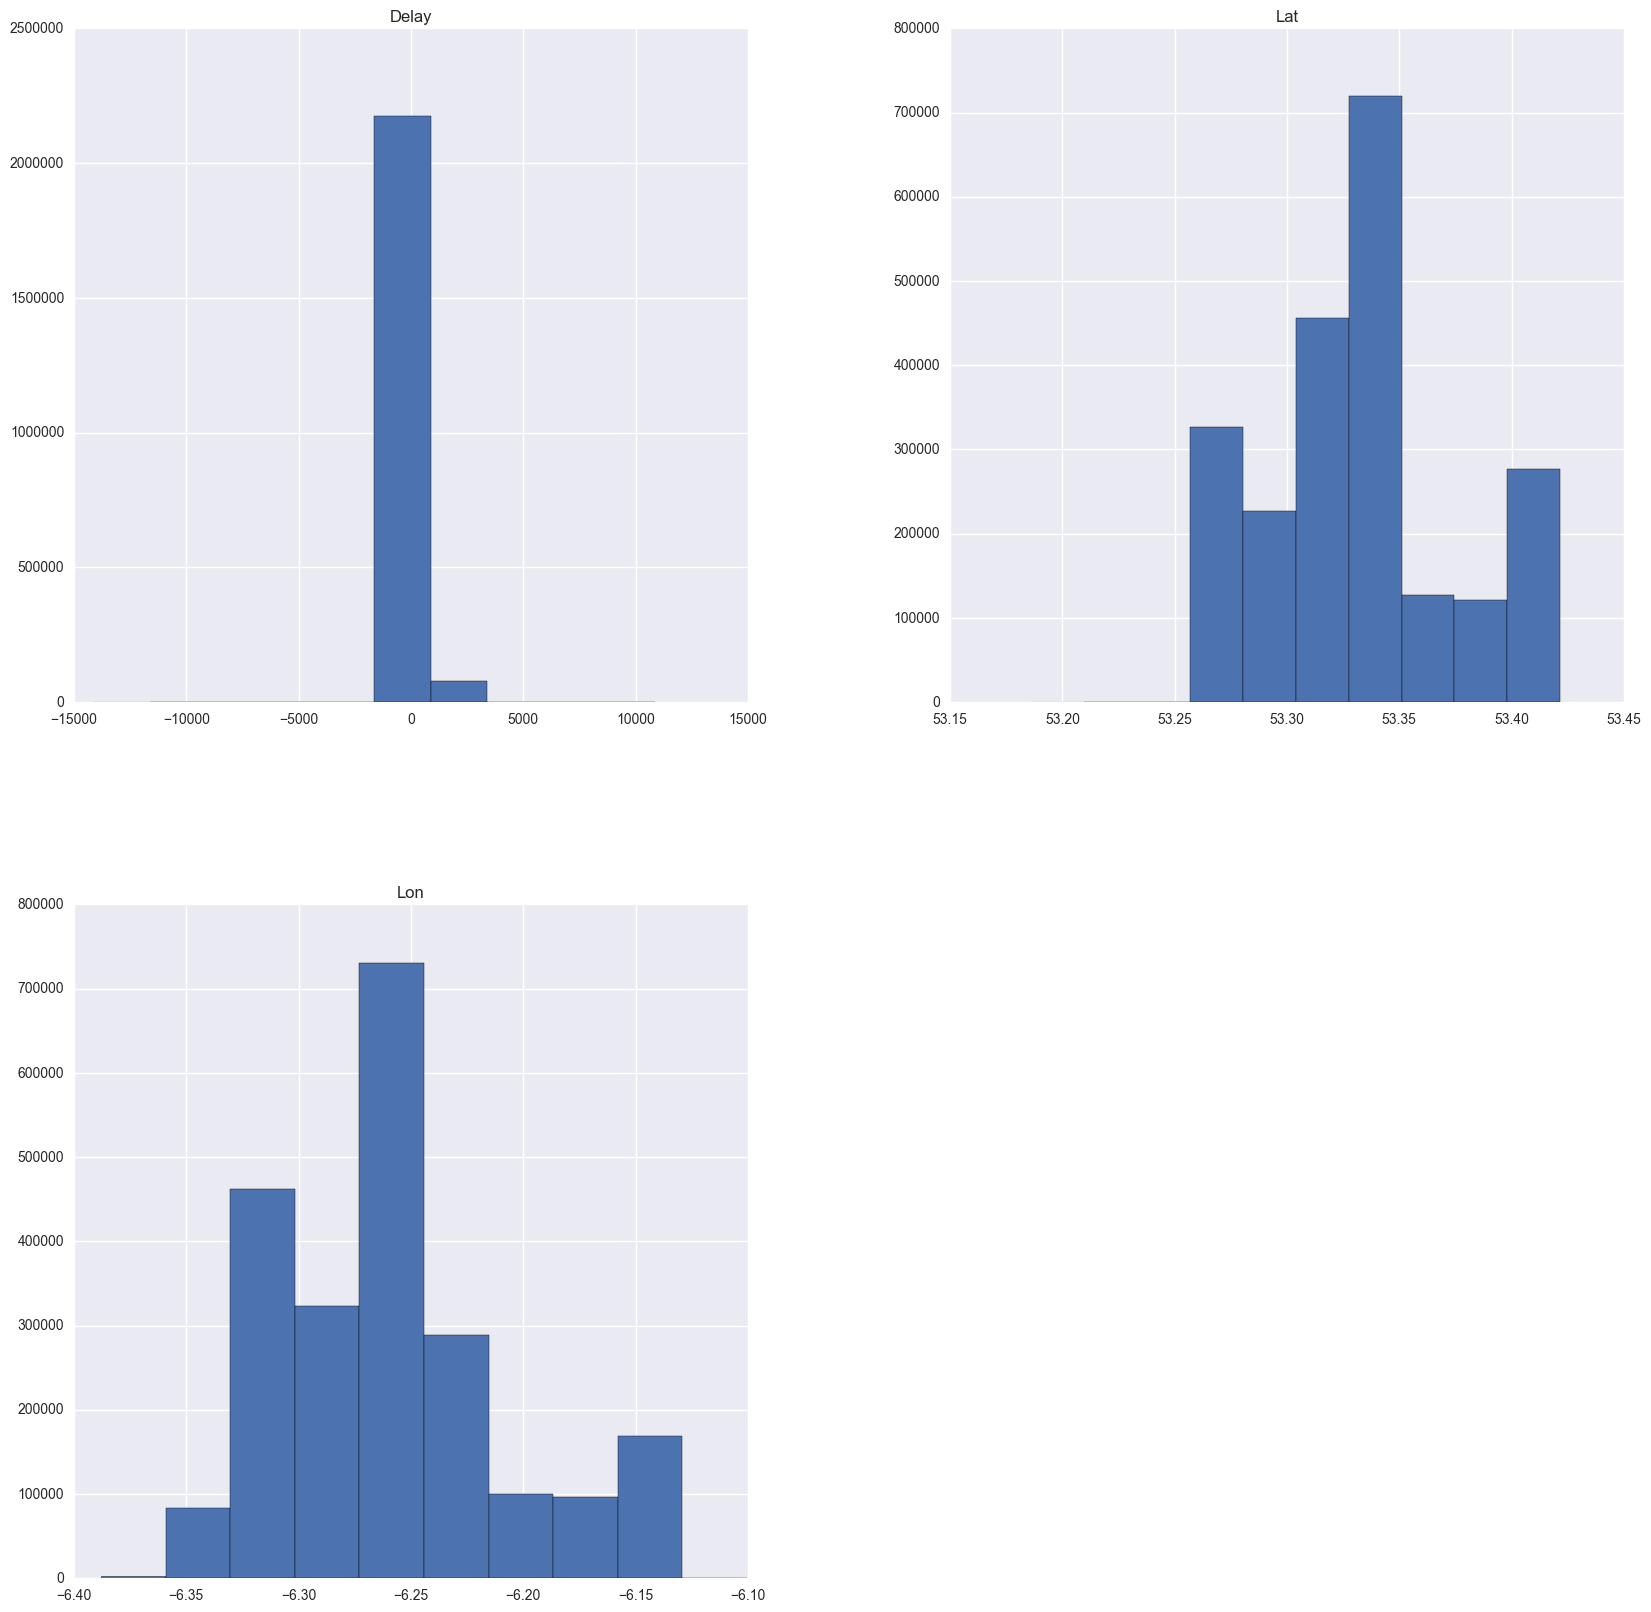

In [50]:
# First we will plot each of the continuous feature using box plots and histograms
# This will be used to distiguish any outliers and show the overall distibution of the features
df[continuous_columns].hist(figsize=(20,20))

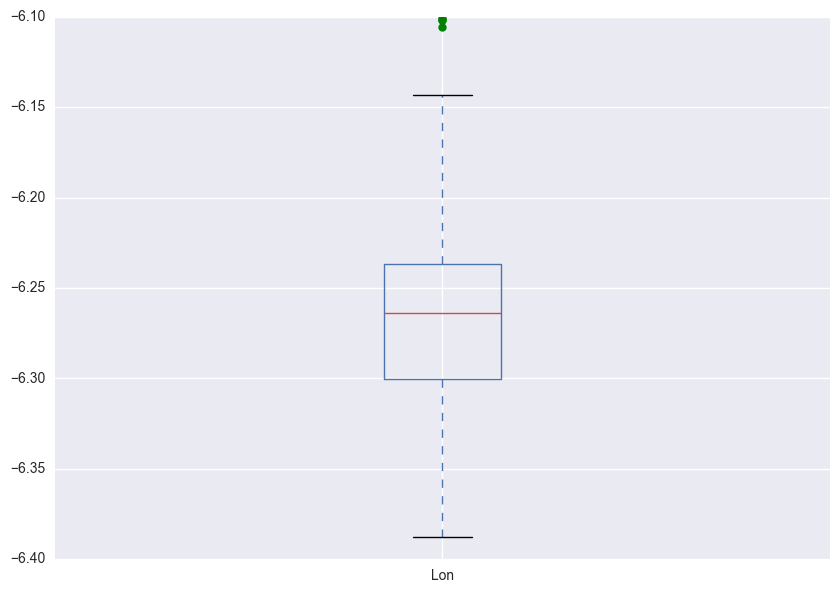

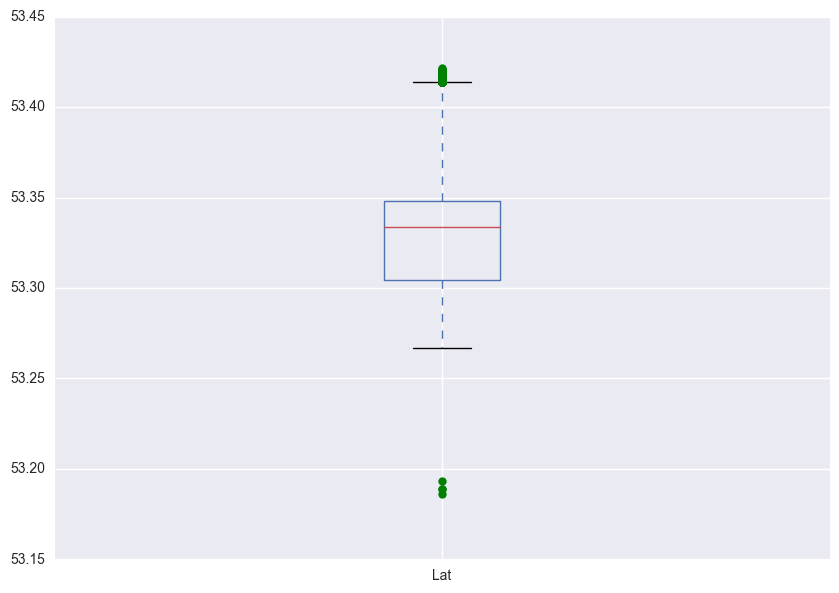

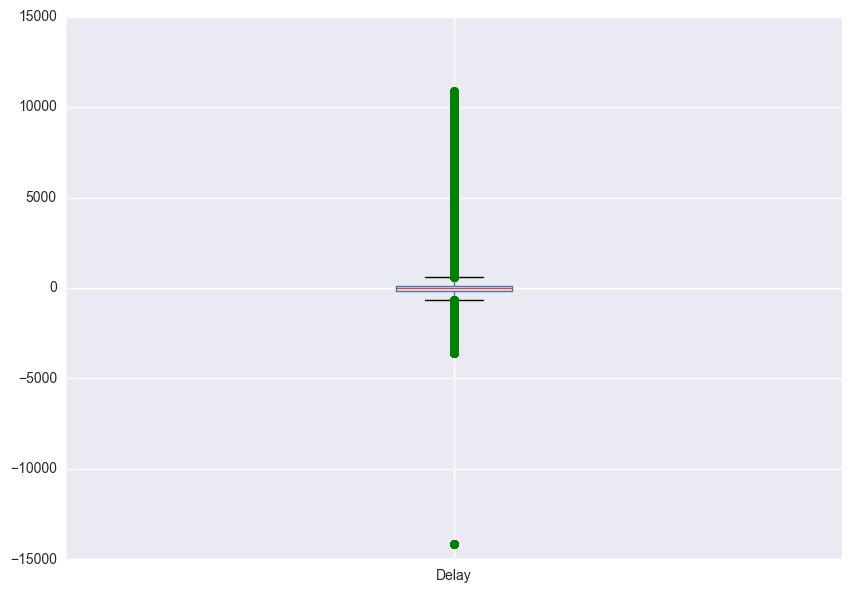

In [51]:
#Plot box plots for all the continuous features
#Similarly this shows us distribution, with the quartile ranges, standard deviation and mean marked. outliers are also
# visualisable in these plots
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
for col in continuous_columns:
    df[col].plot(kind='box', subplots=True, flierprops=flierprops, figsize=(10,7))
    plt.show()

In [52]:
cat_cols = df.select_dtypes(['category'])

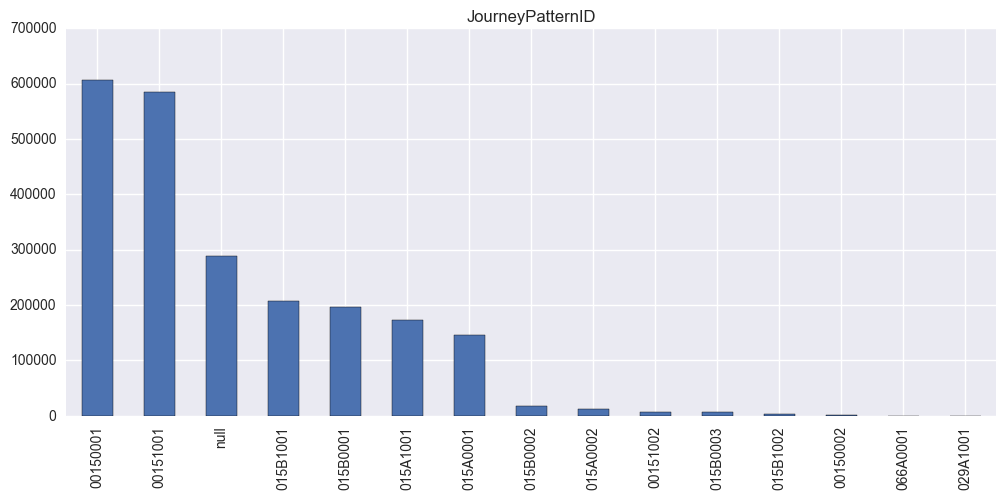

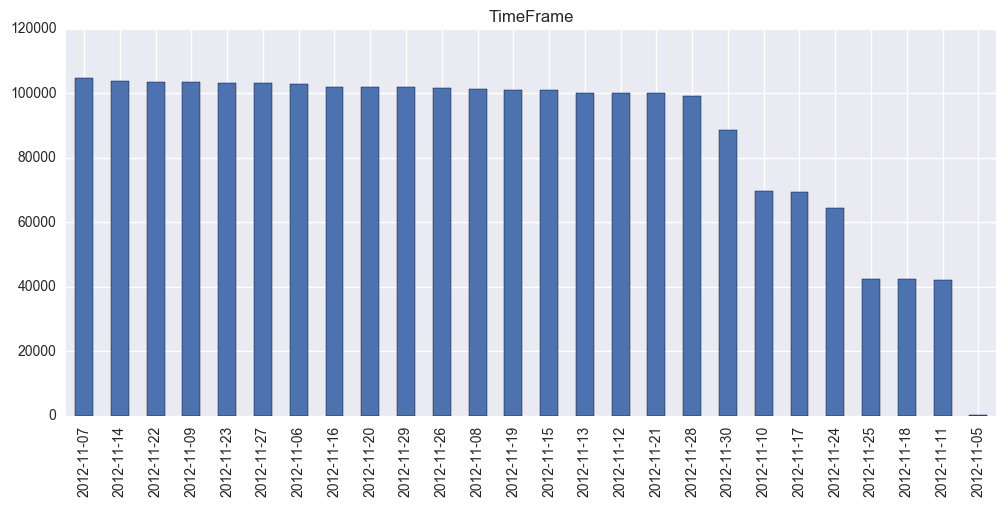

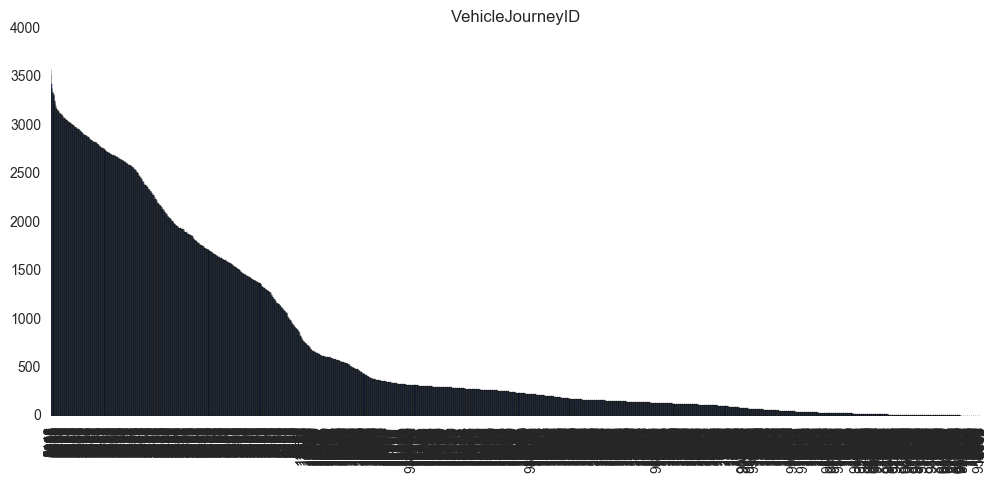

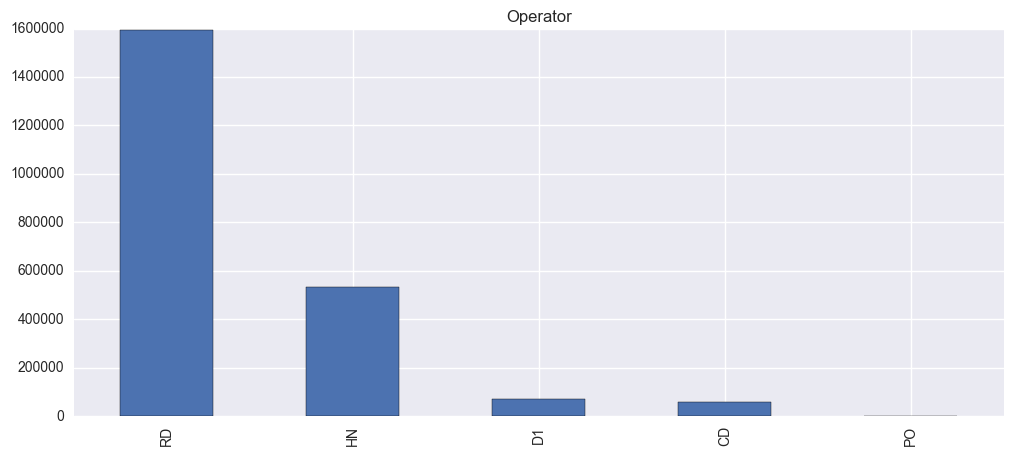

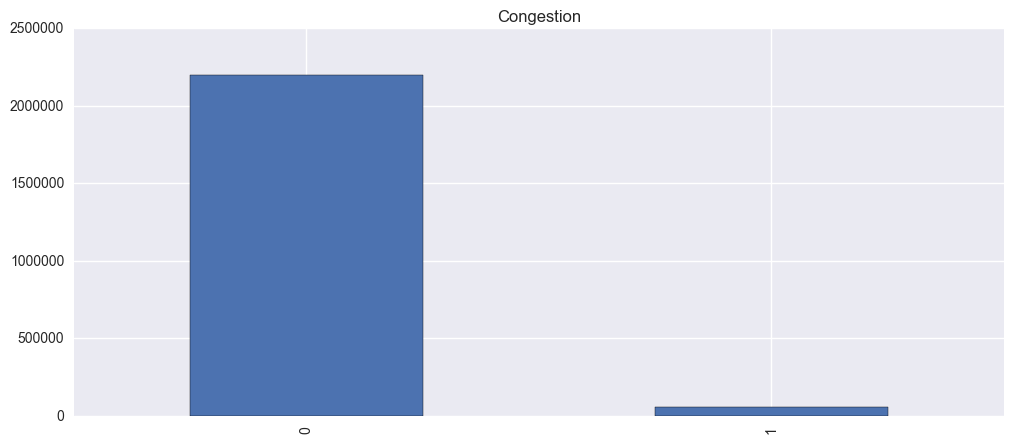

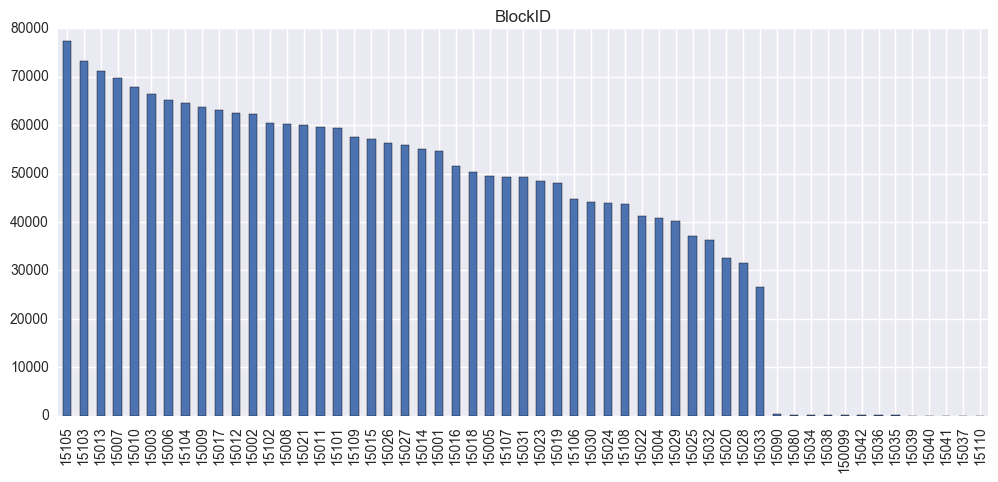

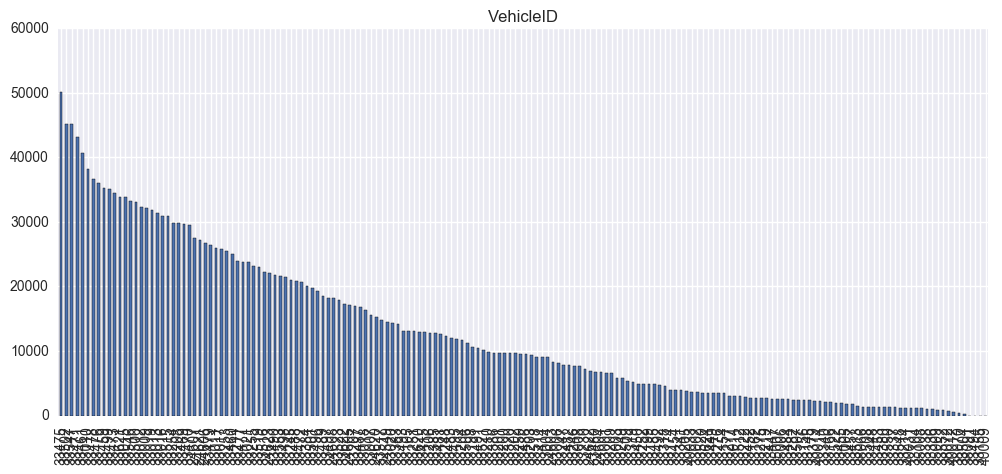

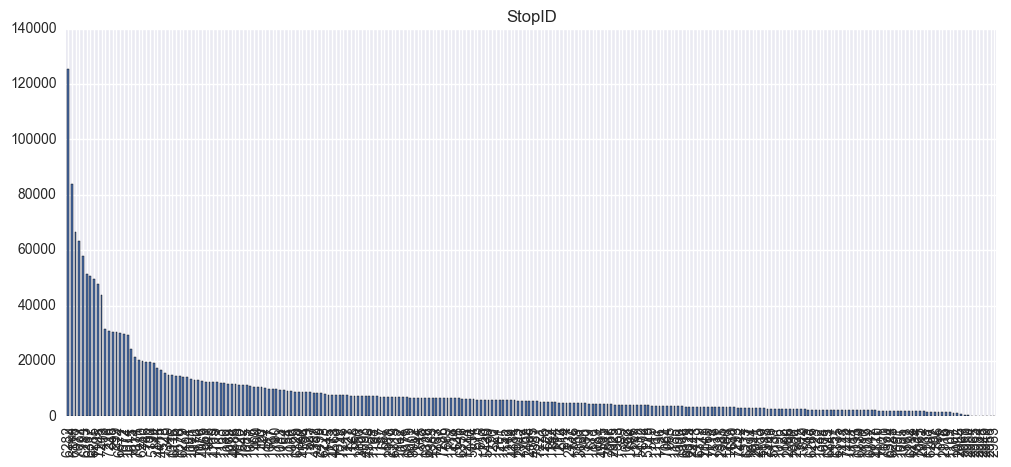

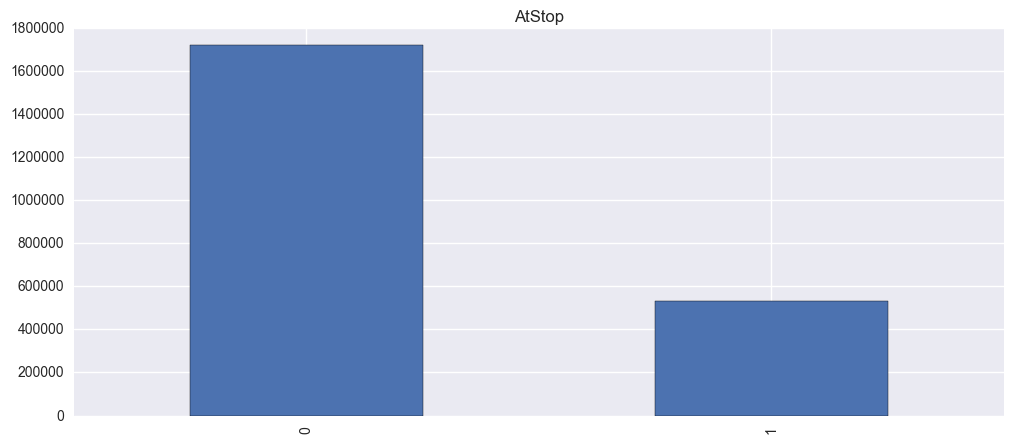

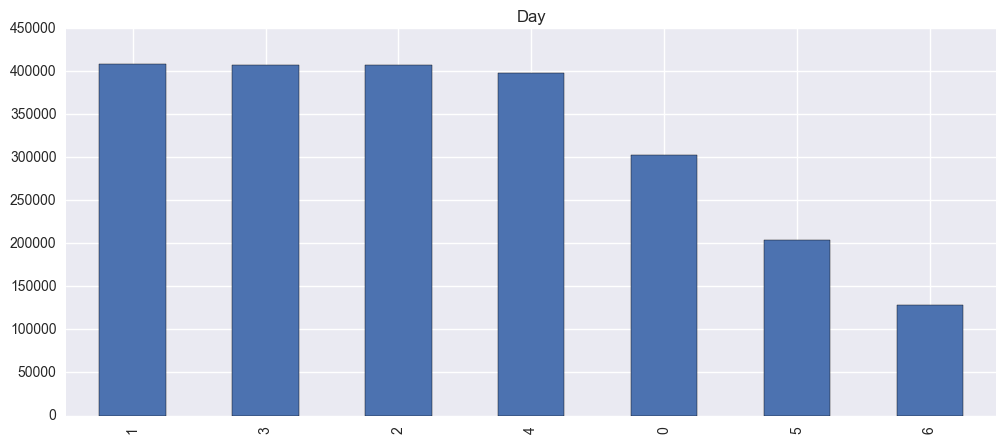

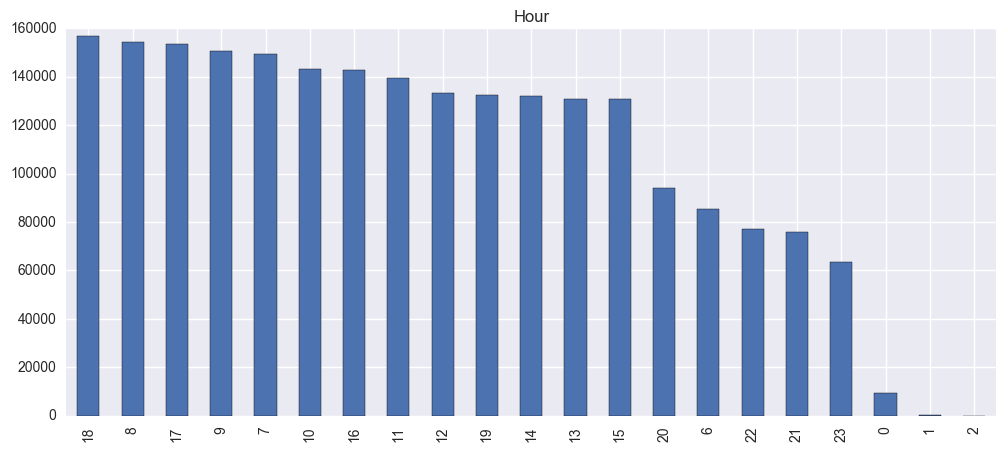

In [53]:
for column in cat_cols:
    f=df[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    plt.show()

### Summary of data Understanding

# Section 3 - Data Preparation 
### Clean and prepare data

Potential problems with the quality of the data, that might influence our models later are:
- Irregular cardinality 
- Null Values 
- Outliers 
- Any Seller selling the same product at the same time 

#### Drop Redundant Features

In [36]:
df = df.drop('BlockID', 1)
df = df.drop('Operator', 1)

#### Null Values

In [38]:
df.isnull().sum()

Timestamp            0
JourneyPatternID    56
TimeFrame            0
VehicleJourneyID     0
Congestion           0
Lon                  0
Lat                  0
Delay                0
VehicleID            0
StopID               0
AtStop               0
Day                  0
Hour                 0
dtype: int64

JourneyPatternID requires action

In [35]:
print("The percentage of null JourneyPatternID is: ", (df["JourneyPatternID"].isnull().sum() /df.shape[0])*100, "%", sep="")

The percentage of null JourneyPatternID is: 0.0024841303991%


This is an insignificant percentage of nulls, nevertheless a handling strategy must be employed. It might be possible to infer the value based on the timestamp and the journey ID

#### Outliers
Delay has significant outliers
Normalisation?

### Aditional Feature Creation



#### Normalisation?

In [41]:
#Normalise by grouping the product and the timeofOfferChange
# df['ListingPrice'] = df.groupby(['ProductId','TimeOfOfferChange'], group_keys=False).apply(lambda g: (g['ListingPrice']-g['ListingPrice'].min())/(g['ListingPrice'].max()-g['ListingPrice'].min()))
df.select_dtypes(exclude=['object'])

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop,Day,Hour
0,2012-11-06 00:00:00,00150001,2012-11-05,5826,0,-6.258584,53.340099,-361,33210,4870,0,1,0
1,2012-11-06 00:00:04,00151001,2012-11-05,5929,0,-6.162066,53.402668,401,33502,6317,1,1,0
2,2012-11-06 00:00:04,015A1001,2012-11-05,3118,0,-6.236166,53.342152,0,33469,2499,0,1,0
3,2012-11-06 00:00:10,00150001,2012-11-05,5843,0,-6.323327,53.277756,-463,33254,4869,0,1,0
4,2012-11-06 00:00:12,015A0001,2012-11-05,3130,0,-6.328856,53.304470,-106,33020,1102,0,1,0
5,2012-11-06 00:00:17,null,2012-11-05,3339,0,-6.322704,53.271786,0,33484,6280,0,1,0
6,2012-11-06 00:00:19,00150001,2012-11-05,5826,0,-6.257967,53.342365,-361,33210,4870,0,1,0
7,2012-11-06 00:00:23,00151001,2012-11-05,5929,0,-6.162233,53.401867,401,33502,6317,1,1,0
8,2012-11-06 00:00:23,015A1001,2012-11-05,3118,0,-6.234233,53.341999,0,33469,2499,0,1,0
9,2012-11-06 00:00:31,00150001,2012-11-05,5843,0,-6.327923,53.276974,-490,33254,4869,0,1,0


In [40]:
continuous_columns.head()

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop,Day,Hour
0,2012-11-06 00:00:00,00150001,2012-11-05,5826,0,-6.258584,53.340099,-361,33210,4870,0,1,0
1,2012-11-06 00:00:04,00151001,2012-11-05,5929,0,-6.162066,53.402668,401,33502,6317,1,1,0
2,2012-11-06 00:00:04,015A1001,2012-11-05,3118,0,-6.236166,53.342152,0,33469,2499,0,1,0
3,2012-11-06 00:00:10,00150001,2012-11-05,5843,0,-6.323327,53.277756,-463,33254,4869,0,1,0
4,2012-11-06 00:00:12,015A0001,2012-11-05,3130,0,-6.328856,53.304470,-106,33020,1102,0,1,0


In [68]:
df.VehicleJourneyID.shape

(2254310,)

In [70]:
print("Unique values for:\n- VehicleJourneyID:", pd.unique(df.VehicleJourneyID.ravel()).shape)

Unique values for:
- VehicleJourneyID: (3264,)


In [69]:
df.VehicleJourneyID.value_counts().shape

(3264,)

In [43]:
Journeys = df.groupby(['VehicleJourneyID'])

In [44]:
Journeys.describe().head(10)

Delay         Lat         Lon
VehicleJourneyID                                          
2564             count  616.000000  616.000000  616.000000
                 mean     3.137987   53.328231   -6.273381
                 std     72.843850    0.015995    0.028236
                 min   -216.000000   53.304371   -6.334587
                 25%    -34.000000   53.311264   -6.286869
                 50%      1.000000   53.330951   -6.264526
                 75%     50.000000   53.345353   -6.256924
                 max    204.000000   53.348297   -6.234236
2565             count  571.000000  571.000000  571.000000
                 mean     0.210158   53.326781   -6.272817

In [56]:
start = Journeys.Timestamp.min()
start.head()

VehicleJourneyID
2564   2012-11-19 06:24:47
2565   2012-11-19 07:13:49
2566   2012-11-19 08:04:16
2567   2012-11-19 06:59:47
2568   2012-11-19 07:58:50
Name: Timestamp, dtype: datetime64[ns]

In [57]:
end = Journeys.Timestamp.max()
end.head()

VehicleJourneyID
2564   2012-11-23 07:05:28
2565   2012-11-23 07:51:48
2566   2012-11-23 09:13:45
2567   2012-11-23 07:50:56
2568   2012-11-23 08:49:54
Name: Timestamp, dtype: datetime64[ns]

In [58]:
duration = start-end
duration.head()

VehicleJourneyID
2564   -5 days +23:19:19
2565   -5 days +23:22:01
2566   -5 days +22:50:31
2567   -5 days +23:08:51
2568   -5 days +23:08:56
Name: Timestamp, dtype: timedelta64[ns]

In [1]:
Trips = df.groupby(['TimeFrame'])

NameError: name 'df' is not defined

In [78]:
Trips.VehicleJourneyID.value_counts()

VehicleJourneyID  TimeFrame   VehicleJourneyID
2564              2012-11-19  2564                122
                  2012-11-20  2564                126
                  2012-11-21  2564                129
                  2012-11-22  2564                134
                  2012-11-23  2564                105
2565              2012-11-19  2565                124
                  2012-11-20  2565                111
                  2012-11-21  2565                119
                  2012-11-22  2565                107
                  2012-11-23  2565                110
2566              2012-11-19  2566                215
                  2012-11-20  2566                252
                  2012-11-21  2566                208
                  2012-11-22  2566                218
                  2012-11-23  2566                220
2567              2012-11-19  2567                152
                  2012-11-20  2567                172
                  2012-11-21  2567 

Transform Time Frame to exclude the night before and night after the journey's main day of operation

In [83]:
morning = df[(df.VehicleJourneyID == 2564) & (df.AtStop == 0) & (df.TimeFrame == "2012-11-20")]
morning

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop,Day,Hour
1245329,2012-11-20 06:24:04,null,2012-11-20,2564,0,-6.334267,53.307049,0,33484,1105,1,1,6
1245348,2012-11-20 06:24:24,015A1001,2012-11-20,2564,0,-6.334267,53.307049,0,33484,1105,1,1,6
1245364,2012-11-20 06:24:42,015A1001,2012-11-20,2564,0,-6.334267,53.307049,0,33484,1105,1,1,6
1245457,2012-11-20 06:26:04,015A1001,2012-11-20,2564,0,-6.332076,53.304390,-21,33484,1107,1,1,6
1245520,2012-11-20 06:27:03,015A1001,2012-11-20,2564,0,-6.325751,53.304428,-21,33484,1109,1,1,6
1245589,2012-11-20 06:28:05,015A1001,2012-11-20,2564,0,-6.322103,53.305256,-21,33484,1111,1,1,6
1245656,2012-11-20 06:29:04,015A1001,2012-11-20,2564,0,-6.318578,53.307621,-58,33484,1112,1,1,6
1245721,2012-11-20 06:30:03,015A1001,2012-11-20,2564,0,-6.310774,53.310291,-58,33484,1114,1,1,6
1245826,2012-11-20 06:31:23,015A1001,2012-11-20,2564,0,-6.302520,53.312592,-37,33484,2437,1,1,6
1245975,2012-11-20 06:33:23,015A1001,2012-11-20,2564,0,-6.287990,53.310123,-83,33484,1120,1,1,6


In [94]:
duration = morning.Timestamp.max() - morning.Timestamp.min()
duration

Timedelta('0 days 00:36:39')

In [99]:
def hours_minutes(td):
    return td.seconds//3600, (td.seconds//60)%60

In [100]:
print(hours_minutes(duration))

(0, 36)


### Data Quality plan

## Data Quality Plan

| Feature                 | Data Quality Issue   | Handling Strategy             |
|-------------------------|----------------------|-------------------------------|
| Timestamp               | None                 | Retain Feature                |



### Data Relationships

# Section 4 -  Predictive Modeling

# Section 5 - Evaluation